In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_path = '/content/drive/MyDrive/Customer_Churn/cleaned/final_data.csv'

In [ ]:
def load_csv(input_path):

  df = pd.read_csv(input_path)
  return df

In [ ]:
final_data = load_csv(input_path)
final_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment,Spending_Trend,Activity_Trend,Declining_Spend_Flag,Declining_Activity_Flag,Attrition_Flag
0,49,0,2,0.0,0.0,0.0,1,34,4,2,...,4,2,2,422,6,0.550,0.817,1,1,0
1,30,1,2,0.0,0.0,1.0,0,30,3,1,...,1,1,5,115,8,0.520,1.099,1,0,1
2,41,1,1,0.0,2.0,1.0,0,50,2,1,...,2,5,4,254,4,1.113,0.674,0,1,0
3,43,1,3,3.0,0.0,2.0,0,40,4,3,...,2,5,5,255,4,0.157,1.160,1,0,1
4,37,0,2,4.0,1.0,0.0,0,26,4,1,...,4,2,2,422,6,0.736,0.755,1,1,0


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99954 entries, 0 to 99953
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              99954 non-null  int64  
 1   Gender                    99954 non-null  int64  
 2   Dependent_count           99954 non-null  int64  
 3   Education_Level           97987 non-null  float64
 4   Marital_Status            96834 non-null  float64
 5   Income_Category           96993 non-null  float64
 6   Card_Category             99954 non-null  int64  
 7   Months_on_book            99954 non-null  int64  
 8   Total_Relationship_Count  99954 non-null  int64  
 9   Months_Inactive_12_mon    99954 non-null  int64  
 10  Contacts_Count_12_mon     99954 non-null  int64  
 11  Credit_Limit              99954 non-null  float64
 12  Total_Revolving_Bal       99954 non-null  float64
 13  Avg_Open_To_Buy           99954 non-null  float64
 14  Total_

# Correlation Plot

In [ ]:
def correlation_heatmap(df):
  sns.set(style="white")

  # Compute the correlation matrix
  corr = df.corr(numeric_only = True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

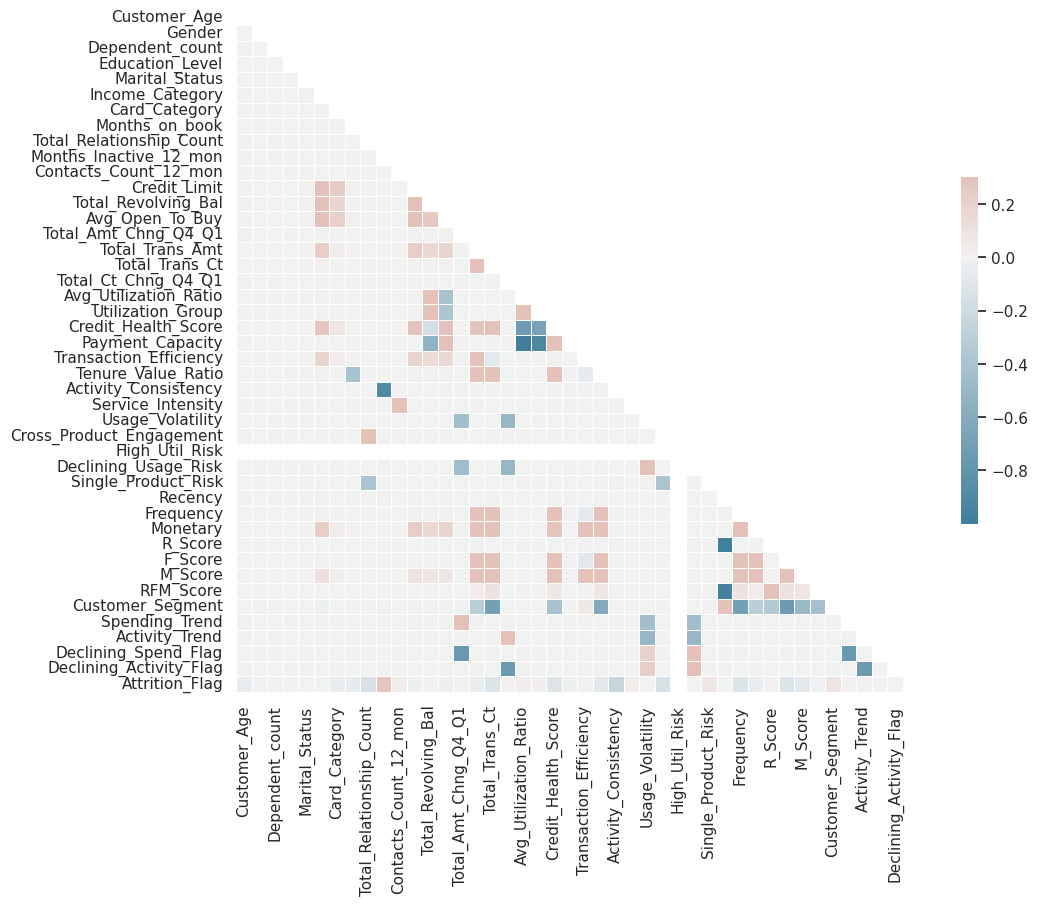

In [ ]:
correlation_heatmap(final_data)

Ensure the categorical values are 'object' types

Categorical Customer Demographics: Gender, Education_Level, Marital_Status, Income_Category, Customer_Age

Categorical Account Charateristics: Attrition_Flag

Cateogorical Behavioural Indicators: Utilization_Group

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99954 entries, 0 to 99953
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              99954 non-null  int64  
 1   Gender                    99954 non-null  int64  
 2   Dependent_count           99954 non-null  int64  
 3   Education_Level           97987 non-null  float64
 4   Marital_Status            96834 non-null  float64
 5   Income_Category           96993 non-null  float64
 6   Card_Category             99954 non-null  int64  
 7   Months_on_book            99954 non-null  int64  
 8   Total_Relationship_Count  99954 non-null  int64  
 9   Months_Inactive_12_mon    99954 non-null  int64  
 10  Contacts_Count_12_mon     99954 non-null  int64  
 11  Credit_Limit              99954 non-null  float64
 12  Total_Revolving_Bal       99954 non-null  float64
 13  Avg_Open_To_Buy           99954 non-null  float64
 14  Total_

In [ ]:
final_data.drop(columns = ['Last_Transaction_Date'], axis = 1)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment,Spending_Trend,Activity_Trend,Declining_Spend_Flag,Declining_Activity_Flag,Attrition_Flag
0,49,0,2,0.0,0.0,0.0,1,34,4,2,...,4,2,2,422,6,0.550,0.817,1,1,0
1,30,1,2,0.0,0.0,1.0,0,30,3,1,...,1,1,5,115,8,0.520,1.099,1,0,1
2,41,1,1,0.0,2.0,1.0,0,50,2,1,...,2,5,4,254,4,1.113,0.674,0,1,0
3,43,1,3,3.0,0.0,2.0,0,40,4,3,...,2,5,5,255,4,0.157,1.160,1,0,1
4,37,0,2,4.0,1.0,0.0,0,26,4,1,...,4,2,2,422,6,0.736,0.755,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,58,0,1,NaN,1.0,NaN,0,31,1,1,...,4,5,4,454,1,0.753,2.057,1,0,1
99950,37,0,1,3.0,1.0,2.0,0,40,2,4,...,1,5,5,155,4,0.621,0.742,1,1,0
99951,43,1,5,0.0,0.0,1.0,0,47,3,1,...,3,2,2,322,8,1.025,0.652,0,1,1
99952,50,0,0,5.0,0.0,4.0,0,33,4,1,...,1,5,4,154,4,1.219,0.000,0,1,0


# Train/Val/Test split

In [ ]:
# Train/Val/Split (70/15/15)
from sklearn.model_selection import train_test_split

X = final_data.drop(columns = ['Attrition_Flag', 'Last_Transaction_Date'] , axis = 1)
y = final_data['Attrition_Flag']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(69967, 43) (69967,)
(14993, 43) (14993,)
(14994, 43) (14994,)


In [ ]:
print(f"\nTraining set missing values:")
print(X_train.isnull().sum().sort_values(ascending=False).head(10))


Training set missing values:
Marital_Status              2164
Income_Category             2031
Education_Level             1357
Dependent_count                0
Gender                         0
Customer_Age                   0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
dtype: int64


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Configure IterativeImputer with mode as initial strategy
imputer = IterativeImputer(
    estimator=BayesianRidge(),  # Much faster than RandomForest
    max_iter=3,                 # Reduce iterations
    tol=1e-2,                  # Higher tolerance
    initial_strategy='most_frequent',
    n_nearest_features=5,      # Use fewer features
    random_state=42
)

# imputer = IterativeImputer(
#     estimator=RandomForestRegressor(  # Changed from Classifier to Regressor
#         n_estimators=10,        # Fewer trees
#         max_depth=5,           # Shallow trees
#         n_jobs=-1             # Use all CPU cores
#     ),
#     max_iter=5,
#     tol=1e-2,
#     initial_strategy='most_frequent',
#     random_state=42
# )

# Fit ONLY on training data to prevent data leakage
imputer.fit(X_train)

# Transform all datasets using the same fitted imputer
X_train_imputed = pd.DataFrame(
    imputer.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_val_imputed = pd.DataFrame(
    imputer.transform(X_val),
    columns=X_val.columns,
    index=X_val.index
)

X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Round and convert categorical columns to integers
categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in categorical_cols:
    X_train_imputed[col] = X_train_imputed[col].round().astype(int)
    X_val_imputed[col] = X_val_imputed[col].round().astype(int)
    X_test_imputed[col] = X_test_imputed[col].round().astype(int)


print(f"Missing values after imputation:")
print(f"Training set: {X_train_imputed.isnull().sum().sum()}")
print(f"Validation set: {X_val_imputed.isnull().sum().sum()}")
print(f"Test set: {X_test_imputed.isnull().sum().sum()}")

print(f"\nFinal shapes:")
print(f"X_train.shape: {X_train_imputed.shape}, y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val_imputed.shape}, y_val.shape: {y_val.shape}")
print(f"X_test.shape: {X_test_imputed.shape}, y_test.shape: {y_test.shape}")

Missing values after imputation:
Training set: 0
Validation set: 0
Test set: 0

Final shapes:
X_train.shape: (69967, 43), y_train.shape: (69967,)
X_val.shape: (14993, 43), y_val.shape: (14993,)
X_test.shape: (14994, 43), y_test.shape: (14994,)


# Feature Selection

## Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_imputed, y_train.astype(int))
mutual_info

array([2.41650715e-03, 7.13001153e-03, 4.75832416e-03, 1.63343226e-03,
       7.97837394e-03, 0.00000000e+00, 3.15732381e-03, 3.97628144e-03,
       1.43199479e-02, 4.63448775e-02, 7.97727072e-03, 0.00000000e+00,
       2.97861391e-03, 1.33664423e-03, 0.00000000e+00, 9.19669233e-03,
       1.29995879e-02, 0.00000000e+00, 5.97683541e-05, 5.07163908e-03,
       4.97772379e-03, 1.71741012e-03, 4.36589789e-03, 1.31482764e-02,
       4.44637583e-02, 6.24737643e-03, 0.00000000e+00, 1.50840168e-02,
       0.00000000e+00, 7.66839196e-03, 6.17167985e-04, 1.62400994e-03,
       1.34411466e-02, 1.12489659e-02, 1.90390309e-03, 1.23214472e-02,
       6.35680430e-03, 9.46532631e-03, 8.18083039e-03, 1.79007815e-04,
       6.26840245e-04, 8.90096118e-03, 9.39366202e-03])

In [ ]:
mutal_info = pd.Series(mutual_info)
mutal_info.index = X_train_imputed.columns
mutal_info.sort_values(ascending=False)

,0
Months_Inactive_12_mon,0.046345
Activity_Consistency,0.044464
Cross_Product_Engagement,0.015084
Total_Relationship_Count,0.014320
Frequency,0.013441
Tenure_Value_Ratio,0.013148
Total_Trans_Ct,0.013000
F_Score,0.012321
Monetary,0.011249
RFM_Score,0.009465


In [ ]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=50).fit(X_train_imputed, y_train.astype(int))
selected__features_mi = X_train_imputed.columns[selected_top_columns.get_support()]
selected__features_mi

Index(['Gender', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Utilization_Group', 'Credit_Health_Score',
       'Tenure_Value_Ratio', 'Activity_Consistency',
       'Cross_Product_Engagement', 'Declining_Usage_Risk', 'Frequency',
       'Monetary', 'F_Score', 'M_Score', 'RFM_Score', 'Customer_Segment',
       'Declining_Spend_Flag', 'Declining_Activity_Flag'],
      dtype='object')

In [ ]:
train_data_mi = pd.DataFrame(X_train_imputed, columns=selected__features_mi)
val_data_mi = pd.DataFrame(X_val_imputed, columns=selected__features_mi)
test_data_mi = pd.DataFrame(X_test_imputed, columns=selected__features_mi)

## Apply SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN
# Apply SMOTEENN to training data only
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(train_data_mi, y_train)

print(f"Training set BEFORE balancing:")
print(f"   Shape: {train_data_mi.shape}")
print(f"   Class 0: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"   Class 1: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print(f"\nTraining set AFTER balancing:")
print(f"   Shape: {X_train_balanced.shape}")
print(f"   Class 0: {(y_train_balanced == 0).sum()} ({(y_train_balanced == 0).mean()*100:.1f}%)")
print(f"   Class 1: {(y_train_balanced == 1).sum()} ({(y_train_balanced == 1).mean()*100:.1f}%)")

Training set BEFORE balancing:
   Shape: (69967, 21)
   Class 0: 55830 (79.8%)
   Class 1: 14137 (20.2%)

Training set AFTER balancing:
   Shape: (57314, 21)
   Class 0: 22834 (39.8%)
   Class 1: 34480 (60.2%)


# Save them to CSV file

In [ ]:
# save them to CSV file
output_path = '/content/drive/MyDrive/Customer_Churn/cleaned'

os.makedirs(output_path, exist_ok=True)

os.makedirs(f"{output_path}/original", exist_ok = True)
os.makedirs(f"{output_path}/mi", exist_ok = True)

# Save X_train_imputed, X_test_imputed, X_val_imputed
X_train_imputed.to_csv(f"{output_path}/original/X_train_imputed.csv", index=False)
X_val_imputed.to_csv(f"{output_path}/original/X_val_imputed.csv", index=False)
X_test_imputed.to_csv(f"{output_path}/original/X_test_imputed.csv", index=False)
print(f"Saved X_train_imputed, X_val_imputed, X_test_imputed to {output_path}/original")

# Save MI-selected features
train_data_mi.to_csv(f"{output_path}/mi/X_train_mi.csv", index=False)
val_data_mi.to_csv(f"{output_path}/mi/X_val_mi.csv", index=False)
test_data_mi.to_csv(f"{output_path}/mi/X_test_mi.csv", index=False)
print(f"Saved X_train_mi, X_val_mi, X_test_mi to {output_path}/mi")

# save target features
y_train.to_csv(f"{output_path}/original/y_train.csv", index=False)
y_val.to_csv(f"{output_path}/original/y_val.csv", index=False)
y_test.to_csv(f"{output_path}/original/y_test.csv", index=False)
print(f"Saved y_train, y_val, y_test to {output_path}/original")

Saved X_train_imputed, X_val_imputed, X_test_imputed to /content/drive/MyDrive/Customer_Churn/cleaned/original
Saved X_train_mi, X_val_mi, X_test_mi to /content/drive/MyDrive/Customer_Churn/cleaned/mi
Saved y_train, y_val, y_test to /content/drive/MyDrive/Customer_Churn/cleaned/original


In [ ]:
print(f"\n💾 Saving Correctly Structured Datasets")
print("="*60)

os.makedirs(f"{output_path}/final_model_ready", exist_ok=True)

# Convert balanced training data back to DataFrame
X_train_balanced_df = pd.DataFrame(X_train_balanced)
y_train_balanced_series = pd.Series(y_train_balanced)

# Save datasets
datasets_to_save = {
    'X_train_balanced.csv': X_train_balanced_df,
    'y_train_balanced.csv': y_train_balanced_series,
    'X_val_imbalanced.csv': val_data_mi,  # Note: imbalanced
    'y_val_imbalanced.csv': y_val,  # Note: imbalanced
    'X_test_imbalanced.csv': test_data_mi,  # Note: imbalanced
    'y_test_imbalanced.csv': y_test   # Note: imbalanced
}

for filename, data in datasets_to_save.items():
    filepath = f"{output_path}/final_model_ready/{filename}"
    data.to_csv(filepath, index=False)
    print(f"✅ Saved {filename}: {data.shape}")

print(f"Saved balanced and imbalanced data to {output_path}/final_model_ready")


💾 Saving Correctly Structured Datasets
✅ Saved X_train_balanced.csv: (57314, 21)
✅ Saved y_train_balanced.csv: (57314,)
✅ Saved X_val_imbalanced.csv: (14993, 21)
✅ Saved y_val_imbalanced.csv: (14993,)
✅ Saved X_test_imbalanced.csv: (14994, 21)
✅ Saved y_test_imbalanced.csv: (14994,)
Saved balanced and imbalanced data to /content/drive/MyDrive/Customer_Churn/cleaned/final_model_ready


In [ ]:
# =====================================
# WHY CLASS 1 ENDED UP LARGER
# =====================================

print(f"\n🎯 Why Class 1 Ended Up Larger (59% vs 41%)")
print("="*60)

print(f"This method was coined by Batista et al (2004), which combines the ability of SMOTE to generate synthetic data using the minority class,")
print(f"and then using ENN which will delete some observations from both the classes.")
print(f"This hybrid method is better for solving the data imbalance problem, than compared to just oversampling or under sampling of data.")

print(f"🔍 Reason 1: ENN removes more 'noisy' Class 0 samples")
print(f"   • Class 0 (majority) often has more diverse/noisy samples")
print(f"   • Class 0 includes edge cases, outliers, borderline samples")
print(f"   • ENN identifies these as 'inconsistent' and removes them")

print(f"\n🔍 Reason 2: Synthetic Class 1 samples are 'cleaner'")
print(f"   • SMOTE creates Class 1 samples in 'safe' regions")
print(f"   • Synthetic samples are interpolated between existing points")
print(f"   • These are less likely to be removed by ENN")

print(f"\n🔍 Reason 3: Credit card churn data characteristics")
print(f"   • Non-churners (Class 0) have diverse behavior patterns")
print(f"   • Churners (Class 1) might have more consistent warning signs")
print(f"   • ENN preserves consistent patterns, removes inconsistent ones")

# =====================================
# IS THIS A PROBLEM?
# =====================================

print(f"\n❓ Is 59% Class 1 a Problem?")
print("="*60)

print(f"✅ Generally NOT a problem because:")
print(f"   • The goal is to create a balanced training set")
print(f"   • 59% vs 41% is much more balanced than 80% vs 20%")
print(f"   • Model can learn both classes effectively")
print(f"   • You still evaluate on imbalanced validation/test sets")

print(f"\n⚠️  Potential concerns:")
print(f"   • If you specifically wanted 50:50 balance")
print(f"   • If the synthetic samples don't represent real patterns")


🎯 Why Class 1 Ended Up Larger (59% vs 41%)
This method was coined by Batista et al (2004), which combines the ability of SMOTE to generate synthetic data using the minority class,
and then using ENN which will delete some observations from both the classes.
This hybrid method is better for solving the data imbalance problem, than compared to just oversampling or under sampling of data.
🔍 Reason 1: ENN removes more 'noisy' Class 0 samples
   • Class 0 (majority) often has more diverse/noisy samples
   • Class 0 includes edge cases, outliers, borderline samples
   • ENN identifies these as 'inconsistent' and removes them

🔍 Reason 2: Synthetic Class 1 samples are 'cleaner'
   • SMOTE creates Class 1 samples in 'safe' regions
   • Synthetic samples are interpolated between existing points
   • These are less likely to be removed by ENN

🔍 Reason 3: Credit card churn data characteristics
   • Non-churners (Class 0) have diverse behavior patterns
   • Churners (Class 1) might have more con